# Hotel Booking Exploratory Data Analysis

## Introduction

### Information about Dataset

The dataset covers up all the recorded hotel booking information. It consists of two kinds of hotels which are resort hotels and city hotels. In the dataset, we have 119,390 rows and 32 columns which gives a different kind of parameters. According to the variables, people can get information about details of booking processes such as lead time, most popular month to travel, deposit type, etc. Unfortunately, there is no price information to analyze the cheapest time to travel or booking. You may find the Hotel Booking data set by clicking [here](https://www.kaggle.com/jessemostipak/hotel-booking-demand).

You may find all variables with explanations below:

- hotel: Hotel type(resort or city)
- is_canceled: Whether a reservation was canceled or not. If it was canceled, it equals 1 or not 0    
- lead_time: Number of days that elapsed between the date of booking and arrival date to the hotel   
- arrival_date_year: The year that was arrived at the hotel     
- arrival_date_month: The month that was arrived at the hotel                   
- arrival_date_week_number: The week number that has been arrived at the hotel               
- arrival_date_day_of_month: The number of the day in that month that has been arrived at the hotel    
- stays_in_weekend_nights: How many weekend nights were booked?                
- stays_in_week_nights: How many weekday nights were booked?                   
- adults: How many adults booked a room?                                
- children: How many children booked a room?                               
- babies: How many babies booked?                                   
- meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined; SC = no meal package; BB = Bed & Breakfast; HB = Half board (breakfast and one other meal – usually dinner); FB = Full board (breakfast, lunch and dinner) 
- country: Guests are coming from which country?                             
- market_segment: Marketing methods of booking. TA = Travel Agent, TO = Tour Operator.                     
- distribution_channel: Channels of purchasing                
- is_repeated_guest: Repeated guest or not. If guest is repeated, it equals 1 or not 0                   
- previous_cancellations: Number of previous cancellations                
- previous_bookings_not_canceled: Number of booking that have not previous cancellations        
- reserved_room_type: Code of room type reserved. Code of room type can not be defined due to anonymity.                  
- assigned_room_type: Code of room type booked. Sometimes reserved room and assigned room may be different due to operational reason such as overbooking.                    
- booking_changes: Number of changes                        
- deposit_type: Types of deposit: No deposit, refundable, non-refundable                          
- agent: ID of the travel agent. Thus, it is not useful variable.                          
- company: Booking company but there are a lot of missing values.                        
- days_in_waiting_list: Number of days the booking was on the waiting list before it was confirmed by the hotel                
- customer_type: Customer types include 4 categories which are Contract, Group, Transient, Transient-party. Contract means that there is an allotment or other contract between guest and hotel. Group as befits the name, a group booking. Transient, guest has not any contract or not related to any group, usual way. Transient-party is same to transient but it is associated to other transient bookings.
- adr: Average daily rate equals total accommodation price divided by the number of nights.
- required_car_parking_spaces: Number of car parking spaces required by the customer           
- total_of_special_requests: Number of special requests made by the customer suach as twin bed or speacial room             
- reservation_status: Last status of reservation; checked out, canceled, no-show(custumer did not check in but informed hotel why it is.
- reservation_status_date: The date that shows the last status of the reservation.

### Objectives

Exploratory data analysis(EDA) will perform in this project by covering the three steps below.

1. Data Preprocessing
2. Data Manipulation and Visualization
3. Outcomes from Analysis


## Exploratory Data Analysis (EDA)

### Data Preprocessing

Here is some basic information about Hotel Booking Data Set:

Number of Instances: 119390
Number of Features: 32

- There is no need to change feature names. The variable, adr's name may be changed.
- 4 columns which are children, country, agent, company have missing values.  The children column was filled by mode of the column because there were just 4 missing values. Company had 94%, agent had 13% and country has 0.4% missing values so these variables were filled by "None". 
- The reservation status date data type were converted to datetime. 
- Double check was carried out by running df.info().

In [1]:
#loading necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data

df = pd.read_csv("C:/Users/ETR04585/Desktop/hotel_bookings.csv")

In [3]:
df.shape

(119390, 32)

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#checking the missing values

df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
total = df.isnull().sum().sort_values(ascending = False)
percent = df.isnull().sum()/len(df)*100
missing_values = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
missing_values.head()

,Total,Percent
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
lead_time,0,0.000000


In [7]:
#filling the missing values

df["children"] = df["children"].fillna(df["children"].mode()[0])
df["company"] = df["company"].fillna("None")
df["country"] = df["country"].fillna("None")
df["agent"] = df["agent"].fillna("None")

In [8]:
#coverting the data type to datetime
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], format="%Y-%m-%d")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

### Data Manipulation and Visualization

#### The Time Range of the Data

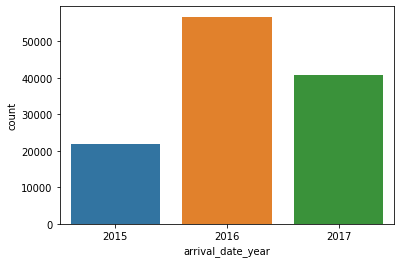

In [10]:
x = df["arrival_date_year"]
sns.countplot(x)


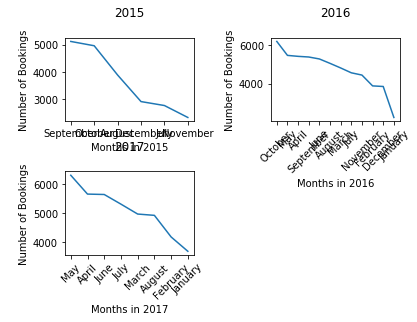

In [11]:
yearly1= df[df["arrival_date_year"] == 2015] 
yearly1= yearly1["arrival_date_month"].value_counts()

yearly2= df[df["arrival_date_year"] == 2016] 
yearly2= yearly2["arrival_date_month"].value_counts()

yearly3= df[df["arrival_date_year"] == 2017] 
yearly3= yearly3["arrival_date_month"].value_counts()


fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplot(2,2,1)
plt.xlabel("Months in 2015")
plt.ylabel("\nNumber of Bookings")
plt.title("2015\n")
plt.plot(yearly1)

plt.subplot(2,2,2)
plt.xticks(rotation=45)
plt.xlabel("Months in 2016")
plt.ylabel("\nNumber of Bookings")
plt.title("2016\n")
plt.plot(yearly2)

plt.subplot(2,2,3)
plt.xlabel("Months in 2017")
plt.ylabel("\nNumber of Bookings")
plt.title("2017\n")
plt.xticks(rotation=45)
plt.plot(yearly3)



According to the above graphs, data includes booking records from July 2015 to July 2017. Only the year that 2016 is a full year, and the others have missing months, so it can not be compared the number of booking yearly based. On the other hand, it can not be stated that there is a monthly trend because, each year, the number of bookings is different from each other.

#### Number of Booking over the Weeks

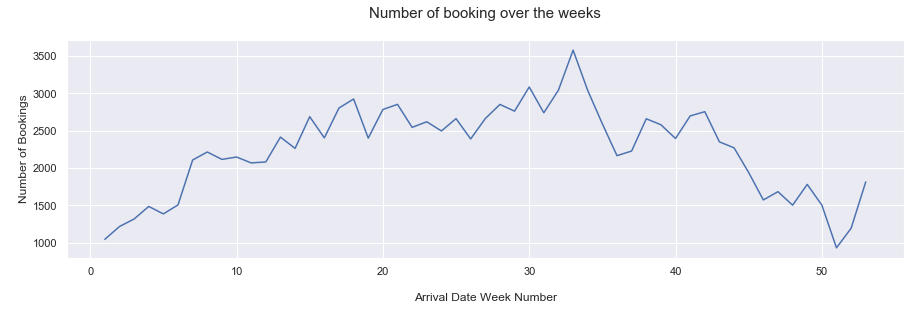

In [12]:
weekly= df["arrival_date_week_number"].value_counts()
weekly= pd.DataFrame(weekly)
weekly = weekly.reset_index()
weekly

sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x="index", y="arrival_date_week_number", data=weekly)
plt.xlabel("\nArrival Date Week Number")
plt.ylabel("\nNumber of Bookings")
plt.title("Number of booking over the weeks\n", fontsize = 15)
plt.show()

This is the general view of the booking distribution based on weeks. The number of bookings reached its peak in the 33rd week. Until the 33rd week, the number of booking increases, and after this peak, numbers decrease through the end of the year like as seen it has reverse u-shape form.

#### The Most Popular Time to Travel based on 2016 Recordings

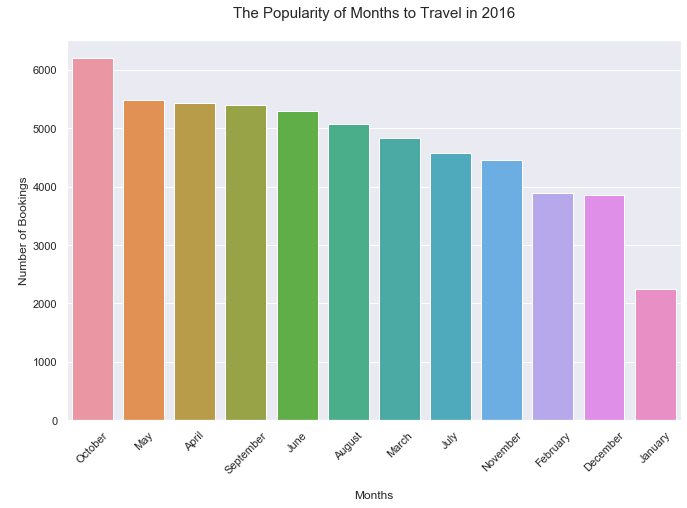

In [13]:
ym16= df[df["arrival_date_year"] == 2016] 
ym16= ym16["arrival_date_month"].value_counts()
ym16 = pd.DataFrame(ym16)
ym16 = ym16.reset_index()


sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "arrival_date_month", data= ym16)
plt.xlabel("\nMonths")
plt.ylabel("\nNumber of Bookings")
plt.title("The Popularity of Months to Travel in 2016\n", fontsize = 15)
plt.xticks(rotation=45)
plt.show()

2016 is a full year, and this graph shows us the distribution of popularity of months for travel. It was supposed that the summer season has more booking. However, October is the number one, and May is following it. Thus, the guest origin will be analyzed to interpret the graph above, and this information can give a clue to find a reason why people books in October more than others.

#### Top Ten Countries with the Most Bookings

First country in the list is Portugal, and it has remarkable number of bookings. Second row belongs to England and third is France. Except Brazil the others are European countries.

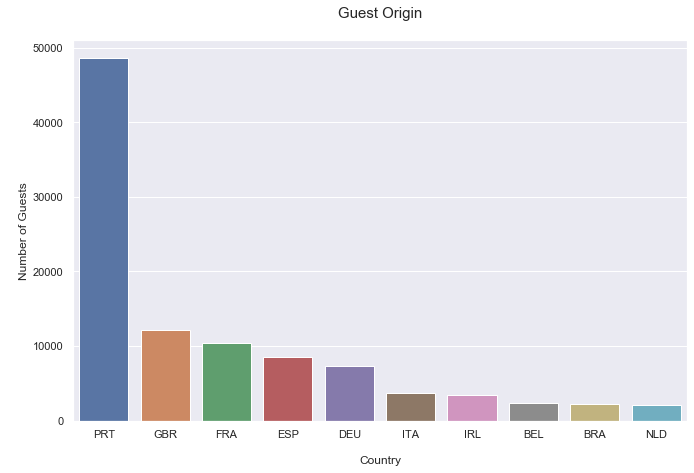

In [14]:
guest_origin_first10 = df["country"].value_counts(sort= True).head(10)
guest_origin_first10 = pd.DataFrame(guest_origin_first10)
guest_origin_first10 = guest_origin_first10.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "index", y= "country", data= guest_origin_first10)
plt.xlabel("\nCountry")
plt.ylabel("\nNumber of Guests")
plt.title("Guest Origin\n", fontsize = 15)
plt.xticks(rotation=0)
plt.show()


In [15]:
guest_origin_first10 = df["country"].value_counts(sort= True).head(10).sum()
guest_origin_first10

guest_origin_total = df["country"].value_counts(sort= True).sum()
guest_origin_total

perc = guest_origin_first10/guest_origin_total*100
perc

perc_all = df["country"].value_counts()/len(df["country"])*100

perc_all_10 = perc_all.head(10)

perc_all_10

PRT    40.698551
GBR    10.159142
FRA     8.723511
ESP     7.176480
DEU     6.103526
ITA     3.154368
IRL     2.826870
BEL     1.961638
BRA     1.862803
NLD     1.762292
Name: country, dtype: float64

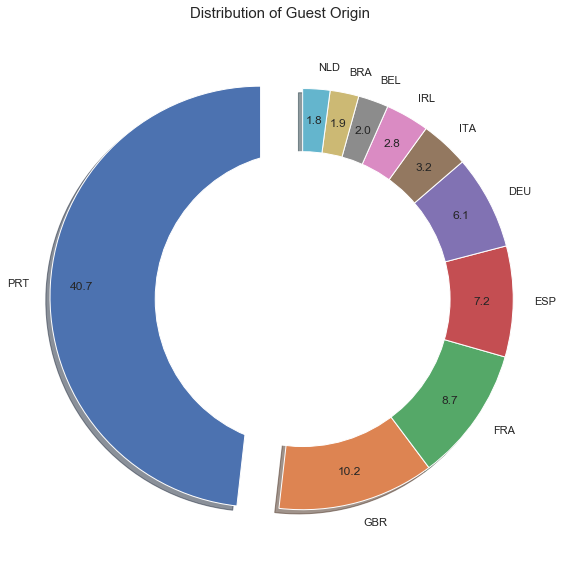

In [16]:
df_perc_all_10 = pd.DataFrame(perc_all_10)
df_perc_all_10 = df_perc_all_10.reset_index()
name = df_perc_all_10["index"].values
value = df_perc_all_10["country"].values
explode = [0.2,0,0,0,0,0,0,0,0,0]

def absolute_value(val):
    a  = np.round(val/100*value.sum(), 1)
    return a

my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(8,8))
plt.pie(value, labels=name, explode=explode, autopct=absolute_value, pctdistance=0.85, startangle=90, shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.title("Distribution of Guest Origin", fontsize=15)
plt.show()

41% of people who have booked consist of Portugal's. However, October includes only the Republic day's founding (5th October) as Portugal's holidays. Therefore, the reason for the peak in October may be interpreted that after the summer holidays, travelers have taken advantage of the lower prices in hotels. 

In [17]:
name
month= df["arrival_date_month"].drop_duplicates().tolist()
month
df_ind= df.set_index("country")
df_country= df_ind.loc[['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'ITA', 'IRL', 'BEL', 'BRA', 'NLD']]
df_country= df_country.reset_index()

C:\Users\ETR04585\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\ETR04585\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


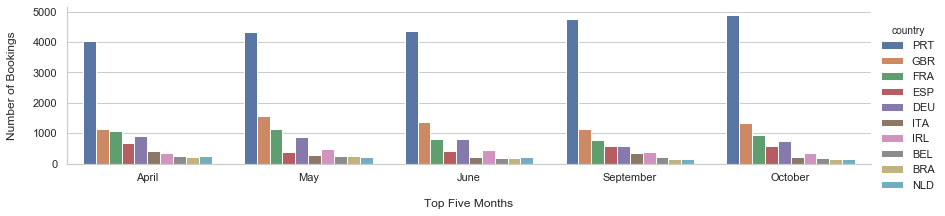

In [18]:
with sns.axes_style('whitegrid'):
    g = sns.factorplot("arrival_date_month", data=df_country, aspect=4.0, kind='count', hue='country', size=3,
                      order= ['April', 'May', 'June', 'September', 'October'])
    g.set_ylabels('Number of Bookings\n')
    g.set_xlabels('\nTop Five Months')

#### Age-group Analysis

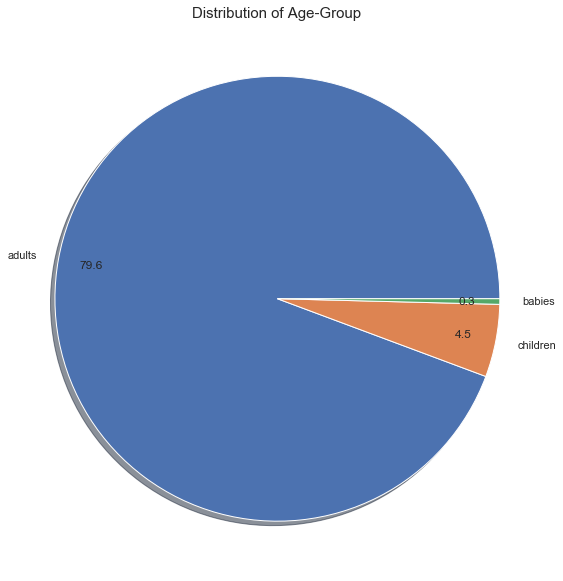

In [19]:
age_cat= df[["adults", "children", "babies"]].agg(sum)
sum_age_cat= age_cat.sum()
rate_age= age_cat / sum_age_cat*100

rate_age = pd.DataFrame(rate_age)
rate_age = rate_age.reset_index()
ra_name = rate_age["index"].values
ra_value = rate_age[0].values

plt.figure(figsize=(8,8))
plt.pie(ra_value, labels=ra_name, autopct=absolute_value, pctdistance=0.85, startangle=0, shadow=True)
fig=plt.gcf()
fig.gca()
plt.axis('equal')
plt.tight_layout()
plt.title("Distribution of Age-Group", fontsize=15)
plt.show()


According to the graph above, adults make up almost 80% of people have booked and children 4.5%, babies 0.3%.

#### Distribution of People Traveling with Children by Country

C:\Users\ETR04585\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


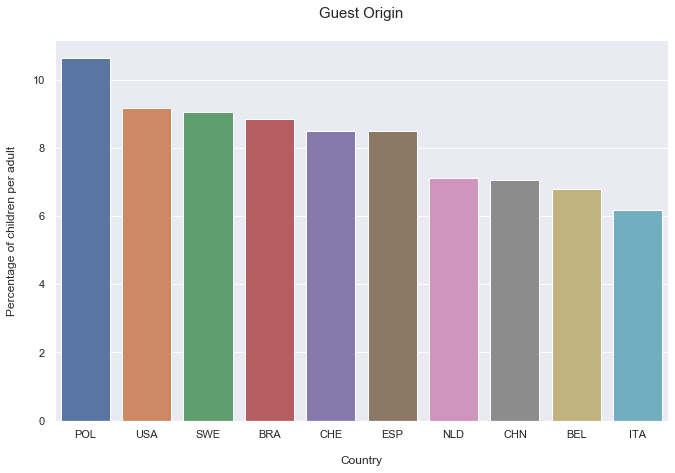

In [20]:
adult_children= df.groupby("country")["adults", "children"].sum()

ac= adult_children.sort_values("adults", ascending= False)

ac["rate"]= ac["children"]/ac["adults"]*100

ac_avg= ac[ac["adults"] > ac["adults"].mean()]

ac_avg_10= ac_avg.sort_values("rate", ascending= False).head(10)

df_ac_avg_10 = pd.DataFrame(ac_avg_10)
df_ac_avg_10 = df_ac_avg_10.reset_index()

sns.set(rc={'figure.figsize':(11, 7)})
sns.barplot(x= "country", y= "rate", data= df_ac_avg_10)
plt.xlabel("\nCountry")
plt.ylabel("Percentage of children per adult\n")
plt.title("Guest Origin\n", fontsize = 15)
plt.xticks(rotation=0)
plt.show()


Poles are the nation who travel with their children most, and The United States is second, and Sweden is third. However, it can be stated that the top ten countries have similar rates and for those countries, marketing campaigns can be organized related to children. 

#### Meal Preference Analysis

- According to top 5 country which has the highest ratio of traveling with children:

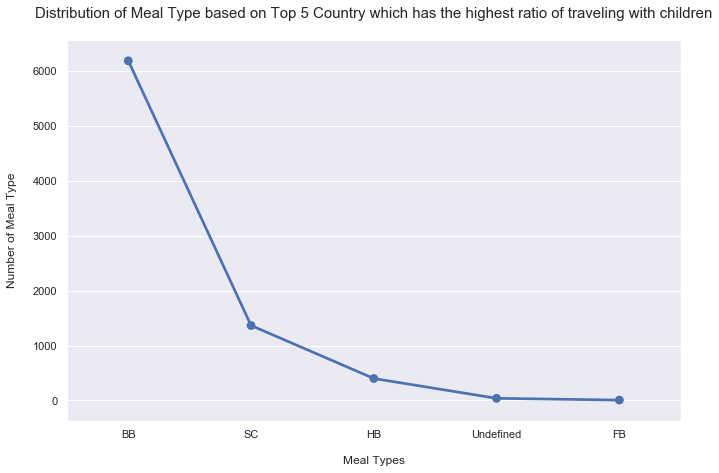

In [21]:
top5_child = df["country"].isin(["POL", "USA", "SWE", "BRA", "CHE"])
top5_child_meal= df[top5_child][["country", "meal"]]
top5_child_meal

meal_type= top5_child_meal["meal"].value_counts()
meal_type = pd.DataFrame(meal_type)
meal_type = meal_type.reset_index()
meal_type

sns.set(rc={'figure.figsize':(11, 7)})
sns.pointplot(x= "index", y= "meal", data= meal_type)
plt.xlabel("\nMeal Types")
plt.ylabel("Number of Meal Type\n")
plt.title("Distribution of Meal Type based on Top 5 Country which has the highest ratio of traveling with children\n", fontsize= 15)
plt.xticks(rotation=0)
plt.show()

Top 5 Country prefer bed and breakfast and no package meal is the most second preference. The number of half-board is highly low and full board is never preferred.

- According to top 5 country which has the lowest ratio of traveling with children:

In [33]:
l5_child = df["country"].isin(["DEU", "PRT", "AUT", "IRL", "ISR"])
l5_child_meal= df[l5_child][["country", "meal"]]
l5_child_meal

,country,meal
0,PRT,BB
1,PRT,BB
6,PRT,BB
7,PRT,FB
8,PRT,BB
...,...,...
119380,DEU,SC
119381,DEU,BB
119383,DEU,BB
119387,DEU,BB


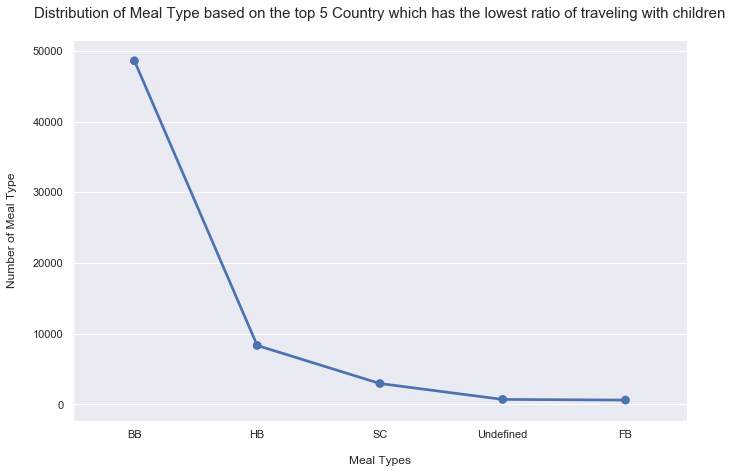

In [22]:
ac_last5= ac_avg.sort_values("rate", ascending= True).head(10)

ac_last5

l5_child = df["country"].isin(["DEU", "PRT", "AUT", "IRL", "ISR"])
l5_child_meal= df[l5_child][["country", "meal"]]
l5_child_meal

meal_type2= l5_child_meal["meal"].value_counts()
meal_type2 = pd.DataFrame(meal_type2)
meal_type2 = meal_type2.reset_index()
meal_type2

sns.set(rc={'figure.figsize':(11, 7)})
sns.pointplot(x= "index", y= "meal", data= meal_type2)
plt.xlabel("\nMeal Types")
plt.ylabel("Number of Meal Type\n")
plt.title("Distribution of Meal Type based on the top 5 Country which has the lowest ratio of traveling with children\n", fontsize= 15)
plt.xticks(rotation=0)
plt.show()

Bed and breakfast are the number one again. There is a difference between the two graphs: half-board goes to the second row, and no meal package is third. These two graphs indicate that people do not change meal preference whether traveling with children or not and in general, traveler choice is bed and breakfast with a big difference.

#### Lead Time and Purchasing Channel Analysis

#### Lead Time

Lead time is the time surpass between the booking date and the arrival date. A hotel can manage its capacity thanks to knowledge coming from lead time analysis. On the other hand, lead time shows that people plan their travel how many days before their arrival. Marketing strategies can be specified based on the lead time for different groups or nations. For example, the graph below indicates that Spain has a narrow lead time, and it means Spanish people plan their travel in a close period before going. However, Germany, England, and Portugal have a wider lead time. These people tend to make long-term plans.

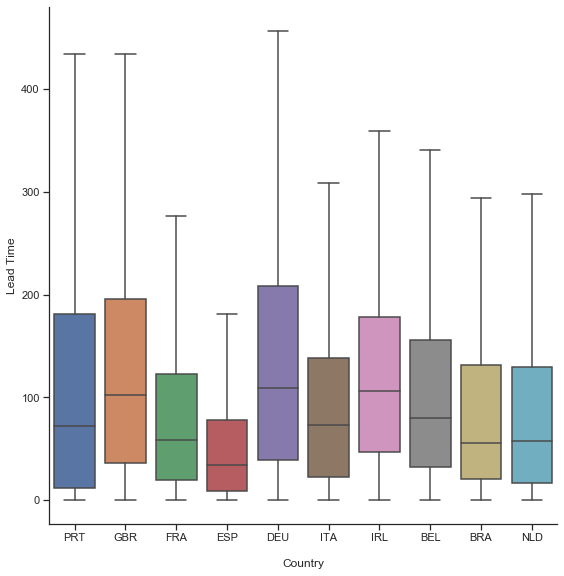

In [23]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("country", "lead_time", data=df_country, kind="box", sym="", height= 8)
    g.set_axis_labels("\nCountry", "Lead Time")

#### The Distribution of the Market Segment of Booking

Nowadays, e-commerce is becoming more popular, so the graph below proves this, and Online TA(Travel Agents) is highly preferred, and also it is more than twice of Offline TA/TO. TO means Tour Operators.

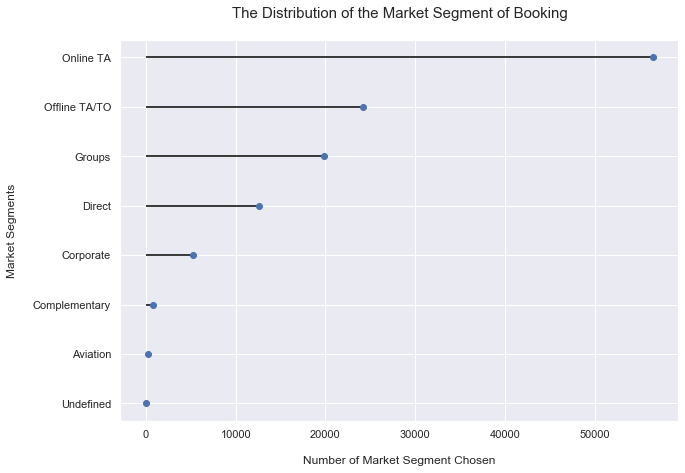

In [24]:
market_type=list(df["market_segment"].value_counts().index)
market_bars=list(df["market_segment"].value_counts())

plt.figure(figsize=(10,7))
plt.hlines(y=market_type,xmin=0,xmax=market_bars,color='black')
plt.plot(market_bars,market_type,"o")
plt.gca().invert_yaxis()
plt.xlabel('\nNumber of Market Segment Chosen')
plt.ylabel('Market Segments\n')
plt.title("The Distribution of the Market Segment of Booking\n", fontsize= 15)
plt.show()

#### The Distribution of the Distribution Channel of Booking

Travelers often book their hotels with Travel Agent or Tour Operator and rarely use direct communications, as the shown graph below.

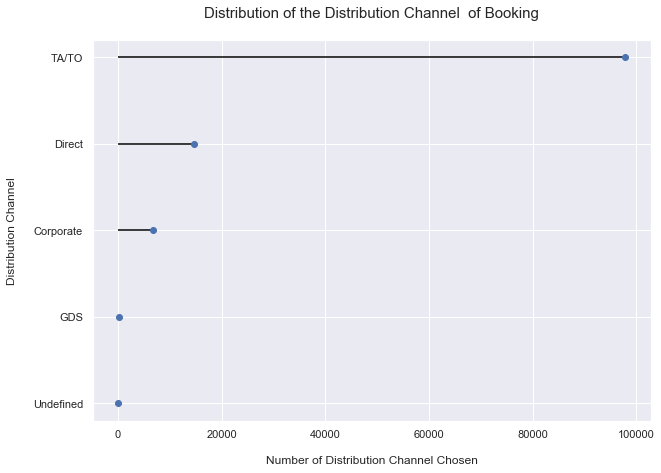

In [25]:
dist_type=list(df["distribution_channel"].value_counts().index)
dist_bars=list(df["distribution_channel"].value_counts())

plt.figure(figsize=(10,7))
plt.hlines(y=dist_type,xmin=0,xmax=dist_bars,color='black')
plt.plot(dist_bars,dist_type,"o")
plt.gca().invert_yaxis()
plt.xlabel('\nNumber of Distribution Channel Chosen')
plt.ylabel('Distribution Channel\n')
plt.title("Distribution of the Distribution Channel  of Booking\n", fontsize= 15)
plt.show()

#### Relationship between Lead Time and Distribution Channel

In [36]:
dist= df["distribution_channel"].isin(["TA/TO", "Corporate", "Direct"])
df_dist= df[dist][["distribution_channel", "lead_time"]]

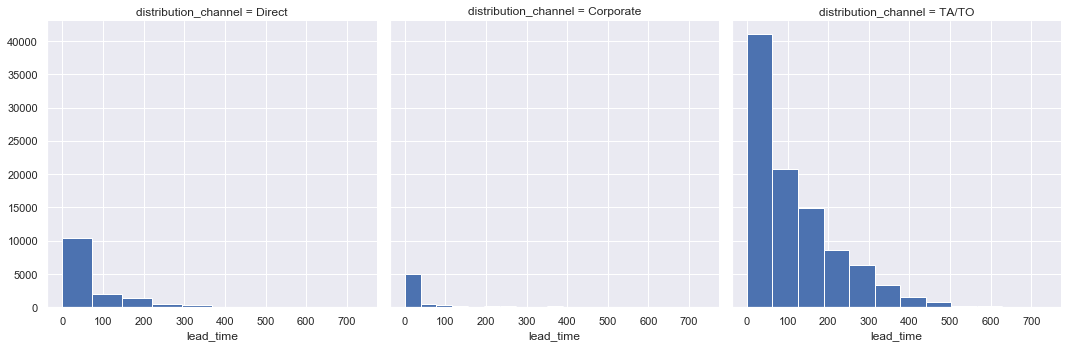

In [35]:
grid = sns.FacetGrid(df_dist, col="distribution_channel", margin_titles=True, height=5)
grid.map(plt.hist, "lead_time");

Even though direct and corporate usage is less, these graphs show that people use these channels to make short-term plans for traveling. TA/TO have short lead times, but the rates of lead time numbers provide to comment that way.

## Key Takeaways

- Most bookings are between the 25th and 40th weeks of the year. It reached its peak in 32 weeks.
- Top 3 booking countries: Portugal, England, and Germany.
- Children and babies make up only 5% of travelers. The rest of the travelers are adults.
- Top 3 booking countries with their children: Poland, USA, and Sweden.
- Most preferred meal package is bad and breakfast. No meal package and half board share second place.
- Spain has the shortest lead time, and Portugal, England, Germany have the longest lead times.
- Most used market segment is the online travel agents. People use travel agents or tour operators for their booking operations.
- People use direct and corporate channels to book short term plans.